# Regresión lineal
En este ejercicio implementarás la solución analítica de regresión lineal. Además, investigarás la influencia de los puntos extremos en el modelo. Antes de empezar importaremos las librerias necesarias. Después, leeremos el archivo que contiene los datos de entrenamiento.

**(TODO) Describe la diferencia entre regresión y clasificación en una oración**

## Ejercicio:
En la siguiente parte queremos implementar la solución de mínimos cuadrados para regresión lineal. Esto significa que dado un set de puntos $\{\mathbf{x_i},y_i\}$, $i = 1, 2, ..., M$ queremos encontrar la línea (o hiperplano en múltiples dimensiones) que minimice el error cuadrático. Este tipo de error, mide la distancia entre los puntos predichos por el modelo lineal contra los valores reales.

La fórmula general de regresión lineal es $\mathbf{y} = \mathbf X \boldsymbol w+ \mathbf{\epsilon}$ donde:

- $\epsilon$ es un vector de dimensionalidad $\mathbb{R}^M$ conteniendo los términos de error $N(0,\sigma^2)$
- $\mathbf{y}$ es el vector de etiquedas
- $\mathbf{X}$ es la *matriz* de data points de dimensionalidad $\mathbb{R}^{M \times D}$. 

Nos interesa calcular los pesos $\hat{\boldsymbol w}$ que definan la función lineal óptima. Como vimos en clase, estos estimados están dados por:

\begin{equation}
\hat{\boldsymbol w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}
\end{equation}

**Tu trabajo**
1. En el primer ejercicio, generaremos un ruido gausiano de dos dimensiones alrededor de una función lineal. Observa como se general los datos y cuáles son los parámetros reales de $\boldsymbol{w}$.
2. Implementarás la solución analítica de regresión lineal. Para ello debes realizar los siguientes pasos.
    1. Modifica la matriz de datos para que se encuentre en la forma de notación aumentada.
    2. Calcula los pesos estimados según la fórmula vista en clase, usando las funciones de numpy y python.
    3. Visualiza la línea resultante (el modelo) en la misma gráfica que de los datos originales.
    3. Calcula la suma de errores residuales de los data points y estima un promedio i.e. $\sum_{i=1}^M \|y(x_i) - y_i \|^2$.
    5. Compara tus resultados con la función integrada de numpy `np.linalg.lstsq(...)`
3. Finalmente, repite los pasos anteriores para generar un modelo de regresión lineal que resuelva del problema de las casas.

## 1. "Toy problem"

(100, 1)
(100, 1)
(2, 1)


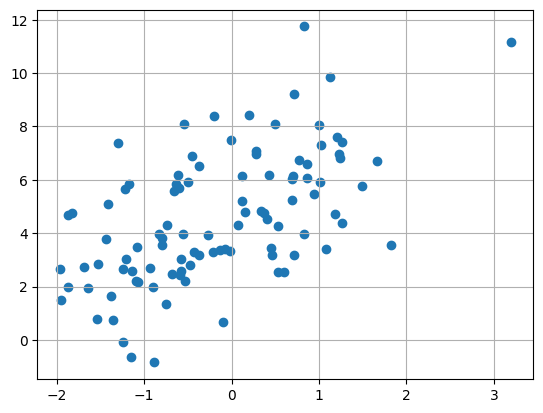

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Generamos datos aleatorios con una desviación estandar conocida
## Alrededor de una funcion lineal conocida y = 1.2x + 5
n_muestras = 100
ruido_blanco_std = 2
X = np.random.randn(n_muestras, 1)
eps = np.random.randn(n_muestras, 1) * ruido_blanco_std
w = np.array([[5, 1.2]]).T
y = w[0] + X * w[1] + eps

## Imprimimos la dimensionalidad de nuestros datos de entrada y las etiquetas
print(X.shape)  # X es de n_muestras, 1 (variable)
print(y.shape)
print(w.shape)

## Graficar los datos
plt.scatter(X, y)
plt.grid()

## 2. Solución a regresión lineal

In [2]:
# 2.1. TODO: Transforma los datapoints X a notación aumentada
n = X.shape[0]

# Creamos una columna de unos (para el término independiente)
unos = np.ones((n, 1))

# Concatenamos los unos con X
X_augmented = np.concatenate([unos, X], axis=1)

print(X_augmented.shape)


(100, 2)


In [3]:
# 2.2 TODO: usa la ecuación anterior (X'X)^(-1)X'Y para calcular los pesos

w_hat = np.linalg.inv(X_augmented.T @ X_augmented) @ (X_augmented.T @ y)

print("Pesos estimados:", w_hat)


Pesos estimados: [[4.80240785]
 [1.36572124]]


(100, 1)


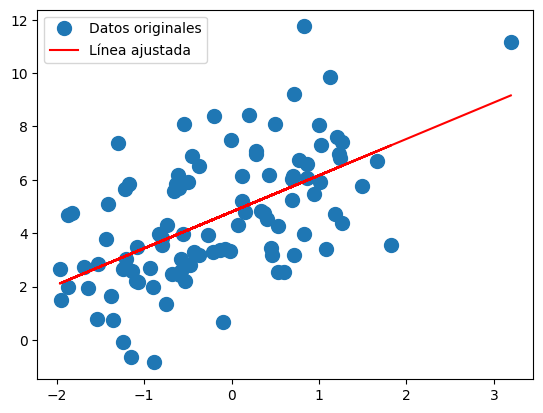

In [4]:
# 2.3 TODO: Calcula las predicciones de tu modelo
y_hat = X_augmented @ w_hat
print(y_hat.shape)

plt.plot(X, y, 'o', label='Datos originales', markersize=10)

# TODO: Grafica las predicciones/ la linea resultante
plt.plot(X, y_hat, 'r', label='Línea ajustada')

plt.legend()
plt.show()


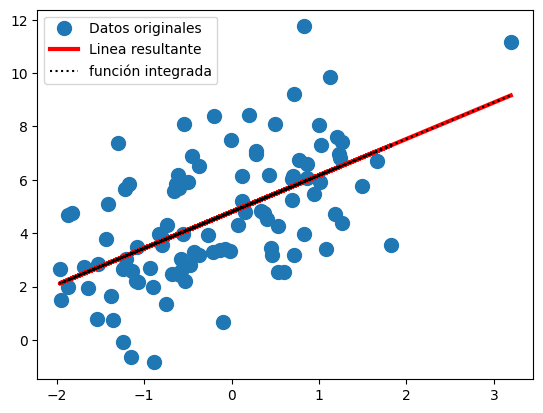

Residuales míos:  395.15947683977805
Residuales numpy: 395.1594768397781


In [5]:
## 2.4 TODO: Calcula la suma de errores cuadrádos
y_hat = X_augmented @ w_hat
residual_mio = np.sum((y - y_hat) ** 2)

## 2.5 TODO: Compara los resultados con la función integrada de numpy 'np.linalg.lstsq'
w_numpy, _, _, _ = np.linalg.lstsq(X_augmented, y, rcond=None)

y_hat2 = X_augmented @ w_numpy
residual_numpy = np.sum((y - y_hat2) ** 2)

# Graficando
plt.plot(X, y, 'o', label='Datos originales', markersize=10)

# TODO: Grafica la linea resultante de TU modelo como en la sección anterior
plt.plot(X, y_hat, 'r', lw=3, label='Linea resultante')

# TODO: Grafica la linea resultante de numpy como en la sección anterior
plt.plot(X, y_hat2, ':k', label='función integrada')
plt.legend()
plt.show()

# TODO: Imprime y compara la suma de errores cuadrádos calculado por TU metodo y el de numpy
print("Residuales míos: ", residual_mio)
print("Residuales numpy:", residual_numpy)


## 3. El efecto de las anomalías

En esta sección analizaremos los datos del problema de las casas para buscar una solución a través de regresión lineal.

Para ello observaremos los datos y aplicaremos un modelo de regresión lineal a los mismos. Después realizarás los mismo pasos en un conjunto con datos filtrados a fin de encontrar un mejor modelo.

Tu trabajo:
1. Utiliza la librería de scikit-learn para encontrar la solución de regresión lineal para el problema de las casas usando el **conjunto de datos de entrenamiento (train_data)**
2. Calcula el error cuadrático en el **conjunto de validación (val_data)**.
3. Repite los dos pasos anteriores para los datos filtrados y observa la diferencia.

In [6]:
# Importar librerias
import pandas as pd
import numpy as np
import os
from pathlib import Path

In [7]:
def read_data(data_dir, file):
    df = pd.read_csv(os.path.join(data_dir, file))
    return df

# Leer los datasets
data_dir = "./data"
data = read_data(data_dir, "train.csv")

# Filtrar los datos para seleccionar las columnas de interes
# y dejar solo los datos del 2010
selected_dim = ["LotArea", "SalePrice"]
data = data[data["YrSold"] <= 2009]
data = data[selected_dim]

# Separamos los datos en diferentes conjuntos
n_datapoints = len(data)
train_data = data[:-n_datapoints//4]
val_data = data[-n_datapoints//4:]

## Visualización
En la siguiente celda visualizamos los datos originales. Observa como contine una distribución densa para cases con un area menor a 50k sqft y un precio menor a 600k USD, y por otro lado contiene datos escasos fuera de estos rangos.

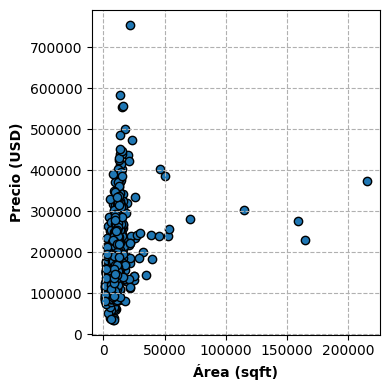

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data(x, labels):
    x_label = "Área (sqft)"
    y_label = "Precio (USD)"
    fig, ax = plt.subplots(figsize=(4,4))
    ax.scatter(x, labels, edgecolors='black') # x, y
    ax.set_ylabel(y_label, fontweight='bold')
    ax.set_xlabel(x_label, fontweight='bold')
    ax.grid(linestyle='--')
    return fig, ax

# Definir variables y etiquetas
X = np.array(train_data["LotArea"])
y = np.array(train_data["SalePrice"])

# Visualizar los datos originales
fig, ax = plot_data(X, y)
fig.tight_layout()
plt.show()

### Regresión en datos originales

Primero aplicaremos regresión lineal a los datos íntegros para observar el efecto de conservar los datos extremos en el entrenamiento del modelo.

Puedes consultar la documentación de sci-kit learn para  [regresión lineal](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) en línea para obtener detalles de como utilizar la función.

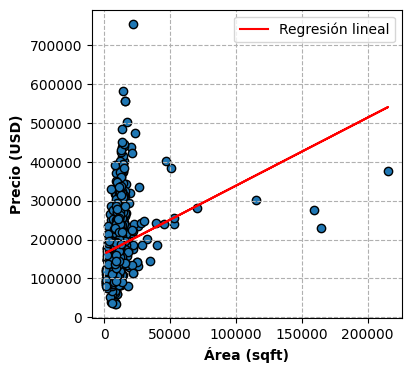

Error cuadrático promedio: 5914790896.838607


In [9]:
from sklearn.linear_model import LinearRegression

# Asegurarse de que X sea una columna
X = X.reshape(-1, 1)

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X, y)

# Hacer predicciones
preds = model.predict(X)

# Graficamos los datos originales
fig, ax = plot_data(X, y)

# Graficar la línea de regresión
ax.plot(X, preds, 'r', label='Regresión lineal')

plt.legend()
plt.show()

# Calcular el error cuadrático promedio
mean_error = np.mean((y - preds)**2)
print("Error cuadrático promedio:", mean_error)


## Pre-procesamiento de datos
Como observamos, estos datos presentan múltiples valores aislados lo que afecta la solución de regresión lineal. 

En la siguiente sección, remueve los valores aislados y repite los pasos anteriores para encontrar un modelo de regresión lineal. C

Calcula el error cuadrático los datos filtrados. 

(TODO: Responde) ¿Cuál es el efecto de pre procesar los datos?

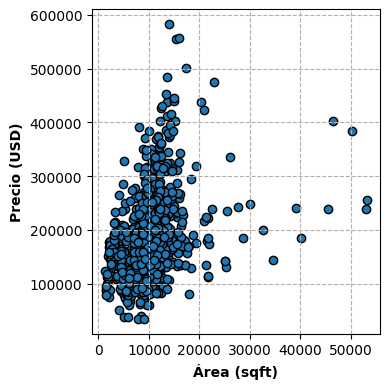

In [10]:
# Filtrar los outliers: LotArea <= 70000 y SalePrice <= 700000
train_data_filtrada = train_data[(train_data["LotArea"] <= 70000) & (train_data["SalePrice"] <= 700000)]

# Definir variables y etiquetas
X_filtered = np.array(train_data_filtrada["LotArea"])
y_filtered = np.array(train_data_filtrada["SalePrice"])

# Graficar los datos filtrados
fig, ax = plot_data(X_filtered, y_filtered)
fig.tight_layout()
plt.show()


### Regresión en datos filtrados

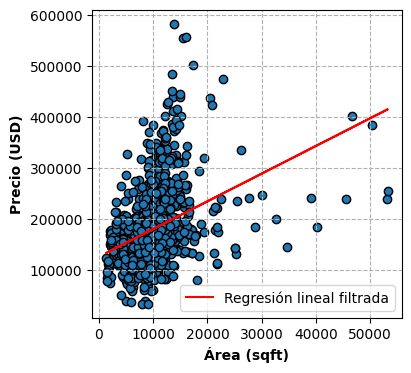

Error cuadrático promedio (filtrado): 5158975431.322841
Diferencia de error: 755815465.5157661


In [11]:
from sklearn.linear_model import LinearRegression

# Asegurarse de que X_filtered sea una columna
X_filtered = X_filtered.reshape(-1, 1)

# Crear el modelo
model_filtered = LinearRegression()

# Entrenar el modelo con los datos filtrados
model_filtered.fit(X_filtered, y_filtered)

# Hacer predicciones
preds_filtered = model_filtered.predict(X_filtered)

# Graficar los datos filtrados
fig, ax = plot_data(X_filtered, y_filtered)

# Graficar la línea de regresión sobre los datos filtrados
ax.plot(X_filtered, preds_filtered, 'r', label='Regresión lineal filtrada')

plt.legend()
plt.show()

# Calcular el error cuadrático promedio
mean_error_new = np.mean((y_filtered - preds_filtered)**2)

# Mostrar la diferencia con el modelo original
print("Error cuadrático promedio (filtrado):", mean_error_new)
print("Diferencia de error:", mean_error - mean_error_new)


## TODO: Responde las siguientes preguntas

**¿Qué puedes concluir de este ejemplo?**

Los valores extremos (outliers) pueden desviar significativamente la recta de regresión.

Al eliminar los outliers, la regresión lineal se ajusta mejor a la tendencia general de los datos y el error disminuye.

**¿Cuál de las dos soluciones es un mejor modelo de nuestros datos?**

La regresión con datos filtrados es mejor porque representa de forma más precisa la relación entre área y precio para la mayoría de las casas, y el error cuadrático promedio es menor.

**¿Además de filtrar los datos, qué estrategias puedes tomar para penalizar más levemente a los valores aislados?**


Dar menos peso a los puntos que están muy lejos al entrenar el modelo.

Cambiar los datos usando transformaciones (como el logaritmo) para que los valores grandes no influyan tanto.

Revisar los datos y corregir o eliminar errores en los valores extremos si es necesario.